# Traffic Sign Image Recognition
## ML2 Team 6
#### Read Dataset from Kaggle

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
#!mkdir ~/.kaggle
!cp /kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign 

 99% 607M/612M [00:06<00:00, 95.2MB/s]
100% 612M/612M [00:06<00:00, 97.9MB/s]


In [ ]:
! unzip gtsrb-german-traffic-sign

# Load The Datasets (Train and Test)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
  path = os.path.join(cur_path, 'train', str(i))
  images = os.listdir(path)

  for a in images:
    # try:
    image = Image.open(path + '/' + a)
    image = image.resize((30,30)) #resize images into 30x30
    image = np.array(image)
    data.append(image)
    labels.append(i)
    # except:
    #   print("Error loading image " + str(i))
data = np.array(data)
labels = np.array(labels)



In [ ]:
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


# EDA

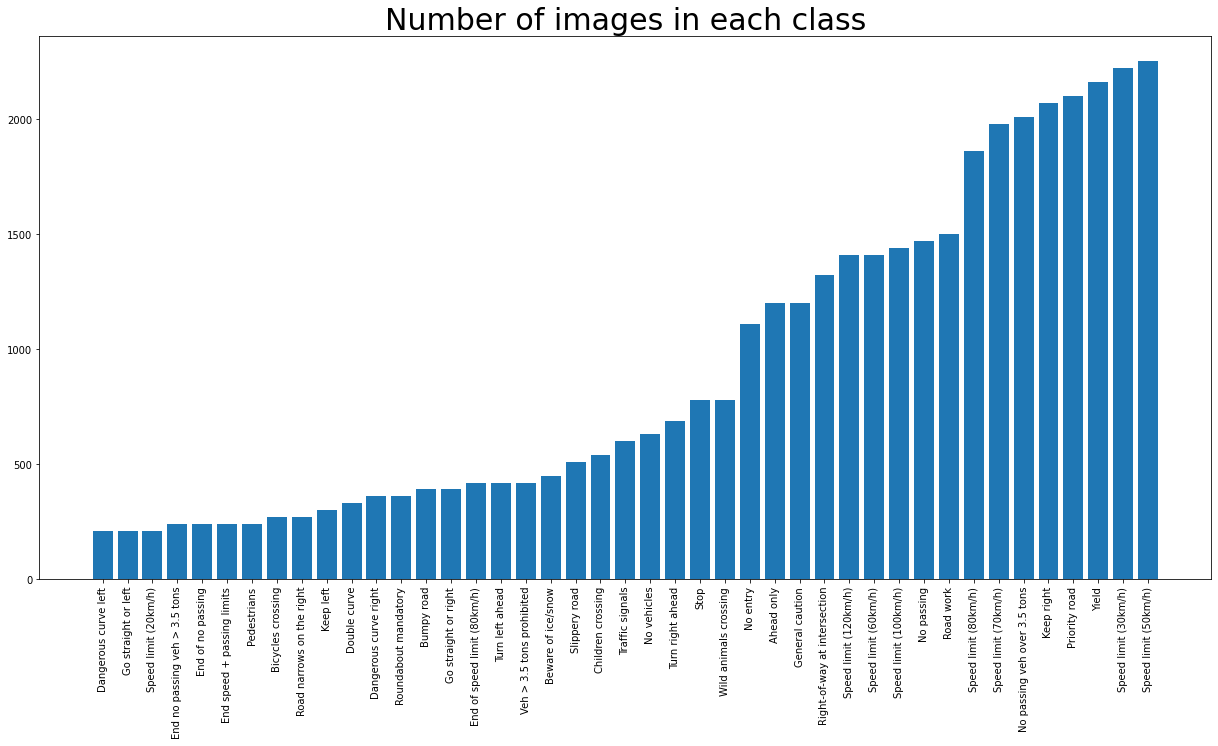

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }
            
train_path = "/content/Train"
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical', size=10)
plt.title('Number of images in each class', size=30)
plt.show()

In [ ]:
class_num

['Dangerous curve left',
 'Go straight or left',
 'Speed limit (20km/h)',
 'End no passing veh > 3.5 tons',
 'End of no passing',
 'End speed + passing limits',
 'Pedestrians',
 'Bicycles crossing',
 'Road narrows on the right',
 'Keep left',
 'Double curve',
 'Dangerous curve right',
 'Roundabout mandatory',
 'Bumpy road',
 'Go straight or right',
 'End of speed limit (80km/h)',
 'Turn left ahead',
 'Veh > 3.5 tons prohibited',
 'Beware of ice/snow',
 'Slippery road',
 'Children crossing',
 'Traffic signals',
 'No vehicles',
 'Turn right ahead',
 'Stop',
 'Wild animals crossing',
 'No entry',
 'Ahead only',
 'General caution',
 'Right-of-way at intersection',
 'Speed limit (120km/h)',
 'Speed limit (60km/h)',
 'Speed limit (100km/h)',
 'No passing',
 'Road work',
 'Speed limit (80km/h)',
 'Speed limit (70km/h)',
 'No passing veh over 3.5 tons',
 'Keep right',
 'Priority road',
 'Yield',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)']

## Split into Train and Test

In [ ]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=123)



#one hot encode outputs
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
num_classes = y_test.shape[1]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, num_classes)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43) 43


# Image Classification

## CNN

In [ ]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
from keras import backend as K

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(30,30,3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(num_classes))

model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
print(model.summary())
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=.25)
score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 64)        0

In [ ]:
score

[0.056009575724601746, 0.9883958101272583]

When run with 10 epochs, the accuracy increased up until epoch 8. After which it started reducing. 

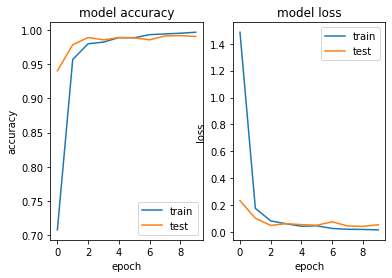

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

# Transfer Learning


In [ ]:
#need images to at least be 32x32 for resnet50 input
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
  path = os.path.join(cur_path, 'train', str(i))
  images = os.listdir(path)

  for a in images:
    # try:
    image = Image.open(path + '/' + a)
    image = image.resize((32,32)) #resize images into 30x30
    image = np.array(image)
    data.append(image)
    labels.append(i)
    # except:
    #   print("Error loading image " + str(i))
data = np.array(data)
labels = np.array(labels)

# Split Dataset into Train and Test

In [ ]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=123)

#one hot encode outputs
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
num_classes = y_test.shape[1]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, num_classes)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367, 43) (7842, 43) 43


**4 Steps**


1.   Instantiate base model & load pre-trained weights
2.   Freeze all layers in base model
3.   Create new model on top of the output of layer(s) from base model
4.   Train new model on new dataset

reference: https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/transfer_learning.ipynb#scrollTo=wIfKhaLqaiQ_


**Instantiate Base Model**

In [ ]:
from tensorflow import keras
base_model = keras.applications.ResNet50(
    include_top=False, #exclude ImageNet classifier layer at the top
    input_shape=(32,32,3),
    weights='imagenet' #load weights pretrained on ImageNet
)

**Freeze Layers in Base Model**

In [ ]:
base_model.trainable = False

**Create New Model on Top of Base Model**

In [ ]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
from keras import backend as K
from keras import layers

# Create new model on top
inputs = keras.Input(shape=(32,32,3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs, outputs)


model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 43)                88107     
Total params: 23,675,819
Trainable params: 88,107
Non-trainable params: 23,587,712
_________________________________________________________________


**Train the top layer**

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()],
)

epochs = 10
hist = model.fit(X_train, y_train, epochs=epochs, batch_size=128, validation_split=0.20)


Epoch 1/10
197/197 [==============================] - 10s 35ms/step - loss: 2.5297 - categorical_accuracy: 0.3998 - val_loss: 1.2399 - val_categorical_accuracy: 0.6054
Epoch 2/10
197/197 [==============================] - 6s 29ms/step - loss: 1.2610 - categorical_accuracy: 0.6030 - val_loss: 0.9862 - val_categorical_accuracy: 0.6822
Epoch 3/10
197/197 [==============================] - 6s 29ms/step - loss: 0.9215 - categorical_accuracy: 0.6972 - val_loss: 0.8369 - val_categorical_accuracy: 0.7298
Epoch 4/10
197/197 [==============================] - 6s 29ms/step - loss: 0.7719 - categorical_accuracy: 0.7397 - val_loss: 0.7872 - val_categorical_accuracy: 0.7437
Epoch 5/10
197/197 [==============================] - 6s 29ms/step - loss: 0.6939 - categorical_accuracy: 0.7626 - val_loss: 0.7115 - val_categorical_accuracy: 0.7687
Epoch 6/10
197/197 [==============================] - 5s 28ms/step - loss: 0.6213 - categorical_accuracy: 0.7871 - val_loss: 0.6728 - val_categorical_accuracy: 0.78

**Evaluate and Test Model**

In [ ]:
score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

246/246 [==============================] - 4s 15ms/step - loss: 0.6267 - categorical_accuracy: 0.7975
Test loss: 0.6266946196556091
Test accuracy: 0.7975006103515625


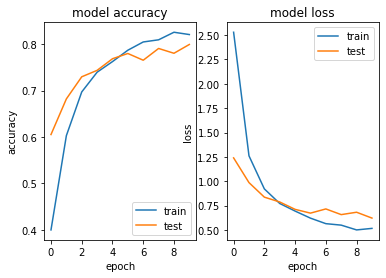

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

**Fine-tune Model**

In [ ]:
#Unfreeze base model
base_model.trainable = True

#Note: the model is running in inference mode because we set `training=False` 
#meaning that the weights in the batch normalization layer in base model will not be 
#updated

model.summary()

#need to recompile after making change to the model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()],
)

epochs = 10
hist = model.fit(X_train, y_train, epochs=epochs, validation_split=0.20)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 43)                88107     
Total params: 23,675,819
Trainable params: 23,622,699
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/10
785/785 [==============================] - 40s 44ms/step - loss: 2.7852 - categorical_accuracy: 0.2

**Evaluate and Test**

In [ ]:
score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

246/246 [==============================] - 4s 14ms/step - loss: 0.1801 - categorical_accuracy: 0.9531
Test loss: 0.18011680245399475
Test accuracy: 0.9530732035636902


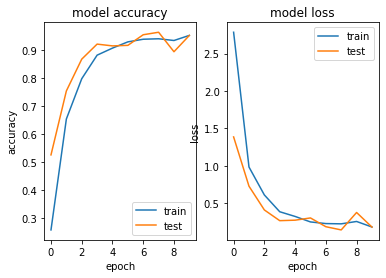

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()